<a href="https://colab.research.google.com/github/ashutoshsinha25/pepcoding_FJP_DS/blob/main/KNN/FJP_DS_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from plotly import data 

In [2]:
iris = data.iris()

In [3]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [4]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
110,6.5,3.2,5.1,2.0,virginica,3
27,5.2,3.5,1.5,0.2,setosa,1
39,5.1,3.4,1.5,0.2,setosa,1
89,5.5,2.5,4.0,1.3,versicolor,2
63,6.1,2.9,4.7,1.4,versicolor,2


In [5]:
X = iris.drop(['species' , 'species_id'] , axis = 1 )
y = iris['species_id']

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train , X_test , y_train , y_test = train_test_split(X , y)

In [11]:
class KNN:

  def __init__(self , k = 3) :
    self.k = k

  def fit(self, X , y):
    self.X_train = X 
    self.y_train = y

  def distance(self, a , b):
    return np.sqrt(((a-b)**2).sum())
  
  def label(self, x):
    dist = np.zeros(self.X_train.shape[0])
    for i , z in enumerate(self.X_train.values):
      dist[i] = self.distance(z , x)
    idx = dist.argsort() 
    idx = idx[: self.k]
    lab = self.y_train.iloc[idx]
    labels , counts = np.unique(lab , return_counts = True)
    return labels[counts.argmax()] 

  def predict(self, X):
    y_pred = np.full(X.shape[0] , self.y_train.iloc[0])
    for i , x in enumerate(X.values):
      y_pred[i] = self.label(x)
    return y_pred

In [12]:
model = KNN()
model.fit(X_train , y_train)

In [13]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test , model.predict(X_test))

0.9473684210526315

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() 
knn.fit(X_train , y_train )
accuracy_score(y_test , knn.predict(X_test))

1.0

In [17]:

train=  []
test = []
for i in range(1,20) :
  skmodel = KNeighborsClassifier(n_neighbors = i)
  skmodel.fit(X_train,y_train)
  test.append(accuracy_score(y_test,skmodel.predict(X_test)))
  train.append(accuracy_score(y_train,skmodel.predict(X_train)))

In [18]:
train=  []
test = []
for i in range(1,20) :
  skmodel = KNN(k = i)
  skmodel.fit(X_train,y_train)
  test.append(accuracy_score(y_test,skmodel.predict(X_test)))
  train.append(accuracy_score(y_train,skmodel.predict(X_train)))

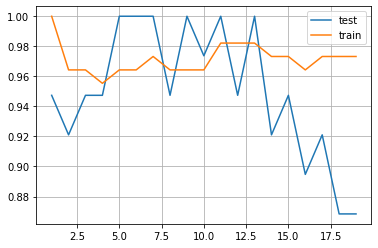

In [19]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1,20),test,label ='test')
plt.plot(np.arange(1,20),train,label = 'train')
plt.legend()
plt.grid()
